In [ ]:
!pip install meteostat

# Paso 1: Librerías


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Paso 2: Descargar datos de Open-Meteo (históricos)

In [ ]:
import requests

# Coordenadas de Bucaramanga
lat = 7.1254
lon = -73.1198

# Fecha de inicio y fin (ajustables)
start_date = "2023-01-01"
end_date = "2024-12-31"

url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum,windspeed_10m_max&timezone=America%2FBogota"

response = requests.get(url)
data = response.json()

# Crear DataFrame
df = pd.DataFrame(data["daily"])
df["time"] = pd.to_datetime(df["time"])
df.head()


,time,temperature_2m_max,temperature_2m_min,precipitation_sum,windspeed_10m_max
0,2023-01-01,24.0,17.1,17.4,7.4
1,2023-01-02,22.7,16.6,3.6,8.5
2,2023-01-03,22.6,18.0,9.5,6.9
3,2023-01-04,22.8,15.9,4.3,11.1
4,2023-01-05,24.9,15.6,1.0,8.7


# Paso 3: Procesamiento de datos

In [ ]:
df["temp_media"] = (df["temperature_2m_max"] + df["temperature_2m_min"]) / 2
df["mes"] = df["time"].dt.month
df["dia"] = df["time"].dt.day
df["año"] = df["time"].dt.year

# Variable objetivo: temperatura media del día siguiente
df["temp_media_tomorrow"] = df["temp_media"].shift(-1)
df = df.dropna()



# Paso 4: Entrenamiento del modelo


In [ ]:
X = df[["temperature_2m_max", "temperature_2m_min", "precipitation_sum", "windspeed_10m_max", "mes", "dia"]]
y = df["temp_media_tomorrow"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Paso 5: Evaluación del modelo


In [ ]:

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f} °C")
print(f"MAE: {mae:.2f} °C")
print(f"R²: {r2:.2f}")


RMSE: 0.46 °C
MAE: 0.36 °C
R²: 0.45


#Visualización

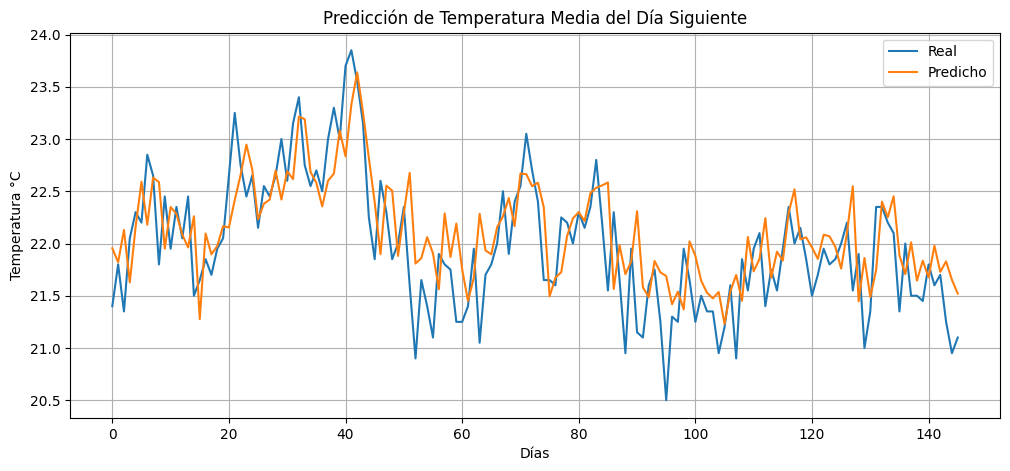

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Real")
plt.plot(y_pred, label="Predicho")
plt.title("Predicción de Temperatura Media del Día Siguiente")
plt.xlabel("Días")
plt.ylabel("Temperatura °C")
plt.legend()
plt.grid()
plt.show()


# modelo y columnas

In [ ]:

joblib.dump(model, "modelo_clima.pkl")
joblib.dump(list(X.columns), "features_clima.pkl")


['features_clima.pkl']

In [ ]:
!pip install flask pyngrok

In [ ]:
from pyngrok import conf
conf.get_default().auth_token = "2xm10dwSZro9sKNIv0XKcLXb5WI_2jotqerTHAi9XZzNPFU4k"


In [ ]:
import requests
import pandas as pd

# Coordenadas de Bucaramanga
lat = 7.1254
lon = -73.1198

# Rango de fechas ajustado (evitar fechas futuras)
start_date = "2010-01-01"
end_date = "2024-12-31"  # Fecha límite conocida

# URL de la API
url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum,windspeed_10m_max&timezone=America%2FBogota"

# Hacer la solicitud
response = requests.get(url)
data = response.json()

# Imprimir la respuesta para depuración
print("Código de estado:", response.status_code)
print("Respuesta completa:", data)

# Si hay datos, crear el DataFrame
if "daily" in data:
    df = pd.DataFrame(data["daily"])
    df["time"] = pd.to_datetime(df["time"])
    print("Datos cargados correctamente:")
    print(df.head())
else:
    print("No se encontró la clave 'daily' en la respuesta.")

Código de estado: 200
Respuesta completa: {'latitude': 7.1353254, 'longitude': -73.18683, 'generationtime_ms': 1204.4641971588135, 'utc_offset_seconds': -18000, 'timezone': 'America/Bogota', 'timezone_abbreviation': 'GMT-5', 'elevation': 997.0, 'daily_units': {'time': 'iso8601', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'precipitation_sum': 'mm', 'windspeed_10m_max': 'km/h'}, 'daily': {'time': ['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-16', '2010-01-17', '2010-01-18', '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28', '2010-01-29', '2010-01-30', '2010-01-31', '2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-06', '2010-02-07', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11', 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")  # Guardar el escalador

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar modelo
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Optimización de hiperparámetros
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

# Guardar el mejor modelo
best_model = grid_search.best_estimator_
joblib.dump(best_model, "modelo_clima_optimizado.pkl")

MSE: 0.213040044520548
MAE: 0.3607808219178079
R²: 0.4494814339643679
Mejores parámetros: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


['modelo_clima_optimizado.pkl']

In [ ]:
lsof -i :5000

SyntaxError: illegal target for annotation (<ipython-input-56-93c6f4758c8e>, line 1)

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

model = joblib.load("modelo_clima.pkl")
features = joblib.load("features_clima.pkl")

@app.route("/")
def home():
    return "✅ API de predicción del clima funcionando"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json()
        input_data = [float(data[feature]) for feature in features]
        input_array = np.array([input_data])
        prediction = model.predict(input_array)[0]
        return jsonify({"predicted_temperature": round(prediction, 2)})
    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/serving.py", line 759, in __init__
    self.server_bind()
  File "/usr/lib/python3.11/http/server.py", line 136, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/usr/lib/python3.11/socketserver.py", line 472, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-06ad8c6918d1>", line 26, in <cell line: 0>
    app.run(host="0.0.0.0", port=5000)
  File "/usr/local/lib/python3.11/dist-packages/flask/app.py", line 662, in run
    run_simple(t.cast(str, host), port, self, **options)
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/serving.py",

TypeError: object of type 'NoneType' has no len()

In [ ]:
from pyngrok import ngrok

public_url = ngrok.connect(5000).public_url
print("URL pública:", public_url)

URL pública: https://f647-35-237-169-191.ngrok-free.app


In [ ]:
df.to_csv("clima_bucaramanga.csv", index=False)

In [ ]:
import requests
import pandas as pd
import os

# Coordenadas de Bucaramanga
lat = 7.1254
lon = -73.1198

# Rango de fechas ajustado
start_date = "2010-01-01"
end_date = "2024-12-31"

# URL de la API
url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum,windspeed_10m_max&timezone=America%2FBogota"

# Hacer la solicitud
response = requests.get(url)
data = response.json()

# Verificar si la solicitud fue exitosa
if response.status_code == 200 and "daily" in data:
    df = pd.DataFrame(data["daily"])
    df["time"] = pd.to_datetime(df["time"])

    # Verificar datos nulos
    print("Datos nulos por columna:")
    print(df.isnull().sum())

    # Guardar datos para análisis
    df.to_csv("clima_bucaramanga.csv", index=False)
    print("Datos guardados en 'clima_bucaramanga.csv'")
    print(df.head())
else:
    print(f"Error en la solicitud. Código: {response.status_code}")
    print("Respuesta:", data)
    raise Exception("No se pudieron obtener los datos de la API.")

# Verificar si el archivo existe antes de cargarlo
if os.path.exists("clima_bucaramanga.csv"):
    # Cargar datos
    df = pd.read_csv("clima_bucaramanga.csv")
    df["time"] = pd.to_datetime(df["time"])
    df["temp_media"] = (df["temperature_2m_max"] + df["temperature_2m_min"]) / 2
    df["mes"] = df["time"].dt.month
    df["dia"] = df["time"].dt.day
    df["temp_media_tomorrow"] = df["temp_media"].shift(-1)
    df = df.dropna()
    print("Datos cargados y procesados correctamente:")
    print(df.head())
else:
    raise FileNotFoundError("El archivo 'clima_bucaramanga.csv' no se encuentra. Asegúrate de que se haya creado correctamente.")

Datos nulos por columna:
time                  0
temperature_2m_max    0
temperature_2m_min    0
precipitation_sum     0
windspeed_10m_max     0
dtype: int64
Datos guardados en 'clima_bucaramanga.csv'
        time  temperature_2m_max  temperature_2m_min  precipitation_sum  \
0 2010-01-01                24.6                14.2                0.6   
1 2010-01-02                24.1                15.4                0.4   
2 2010-01-03                25.0                14.7                0.1   
3 2010-01-04                24.4                15.3                0.7   
4 2010-01-05                24.7                15.5                0.7   

   windspeed_10m_max  
0                8.0  
1                8.7  
2                8.0  
3                8.3  
4                7.6  
Datos cargados y procesados correctamente:
        time  temperature_2m_max  temperature_2m_min  precipitation_sum  \
0 2010-01-01                24.6                14.2                0.6   
1 2010-01-02     